# Домашнее задание 1. Подготовка данных для моделирования

В этом домашнем задании вы будете работать с датасетом о кофе и отзывах на него: проводить предобработку данных, анализировать качество и структуру признаков, обрабатывать пропуски и аномалии, а также проектировать новые признаки. Все задания связаны между собой и последовательно подготавливают данные к построению модели машинного обучения, предсказывающей стоимость кофе на основе его характеристик, региона произрастания, степени обжарки и пользовательских оценок.



In [1]:
# Импорт библиотек, дополняйте по необходимости
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import feature_selection
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

## Знакомство с данными

**Исходный датасет имеет 12 признаков:**
* `uid` — уникальный идентификатор отзыва
* `name` — название кофе;
* `roaster` — название компании обжарщика;
* `roast` — степень обжарки кофе: Dark — темная, Medium-Dark — средне-темная, Medium — средняя, Medium-Light — средне-светлая, Light — светлая;
* `loc_country`— название страны, локация расположения обжарщика;
* `origin_1` — регион_1 произрастания кофе;
* `origin_2` — регион_2 произрастания кофе;
* `rating` — рейтинг кофе;
* `review_date` — дата, когда был оставлен отзыв на кофе;
* `desc_1` — текстовое описание кофе;
* `source_review` — источник отзыва;
* `100g_USD` — цена кофе за 100 г в долларах США (**целевой признак**).

Начнем исследование со знакомства с предоставленными данными. Для решения заданий этого раздела полезно вспомнить пятерку атрибутов pandas для первичного анализа данных. Не забудьте написать **короткие выводы** после каждого задания.


### Задание 1
Прочитайте данные `coffee_analysis.csv`, выведите семпл из нескольких строк и проверьте их размер. Достаточно ли данных для обучения ML-алгоритмов? Напишите код и короткий вывод (достаточно одного предложения).

In [2]:
df = pd.read_csv('coffee_analysis.csv')

df

,uid,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,desc_1,source_review
0,565e9123c6554a48bd0fb1fdc3cd2227,“Sweety” Espresso Blend,A.R.C.,Medium-Light,Hong Kong,Panama,Ethiopia,14.32,"95,0",November 2017,"Evaluated as espresso. Sweet-toned, deeply ric...",cite
1,813a7c786bdf42d6b14e9b489c4ce108,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Guji Zone,Southern Ethiopia,4.70,"92,0",November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roa...",cite
2,ba6670beda0447499ca11fae5c98c113,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Guji Zone,Oromia Region,4.19,"92,0",November 2017,"Delicate, sweetly spice-toned. Pink peppercorn...",cite
3,baca66cf2ad942b39780e4dbd59138c3,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Gedeb District,Gedeo Zone,4.85,"94,0",November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan...",cite
4,5083c797d68a40e29ccdd6919efe4fc8,Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,Light,United States,Odo Shakiso District,Guji Zone,5.14,"93,0",November 2017,"Delicate, richly and sweetly tart. Dried hibis...",cite
...,...,...,...,...,...,...,...,...,...,...,...,...
1991,cb19d7b9d06a4991845fb8ee418bcdf8,Finca Patzibir,El Gran Cafe,Medium-Light,Guatemala,Lake Atitlán,Guatemala,4.70,"92,0",November 2022,"Crisply sweet, nut-toned. Almond brittle, pie ...",cite
1992,4c9d27ec5fa74f42af56c6b2e4d764c0,Proyecto Aurora,El Gran Cafe,Medium-Light,Guatemala,Antigua Growing Region,Guatemala,2.94,"93,0",November 2022,"Chocolaty, floral-framed. Cocoa nib, honeysuck...",cite
1993,9012c5e219304dd9bd47554f6a534bb2,Finca El Potrero,El Gran Cafe,Medium-Light,Guatemala,Antigua Growing Region,Guatemala,2.94,"93,0",November 2022,"High-toned, enticingly sweet. Black cherry, na...",cite
1994,c5caf3e492ab4c92b50083a04848d256,Chacayá Santiago Atitlán,El Gran Cafe,Medium-Light,Guatemala,Lake Atitlán,Guatemala,4.70,"93,0",November 2022,"Vibrantly sweet, subtly nuanced. Apricot, dar...",cite


**Вывод:** мы имеем 1996 строк и 12 столбцов.
Данных достаточно.

### Задание 2
Проверьте типы признаков и наличие пропусков. Все ли типы столбцов логичные — нет неожиданностей, которые нужно исправить? Также прикиньте, как будете заполнять пропущенные значения. Напишите код и короткий вывод (достаточно одного предложения).

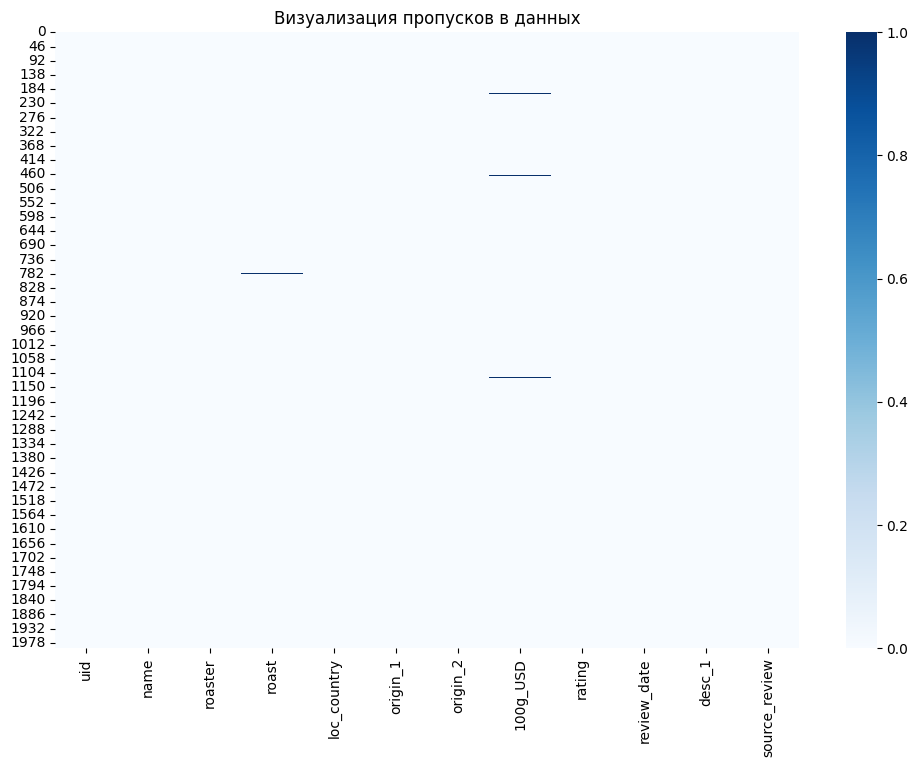

In [3]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='Blues')
plt.title('Визуализация пропусков в данных')
plt.show()

In [4]:
for col in df.columns:
    col_miss = df[col].isnull().sum()
    if col_miss > 0:
        print(f'{col}: {col_miss} пропусков')

roast: 12 пропусков
100g_USD: 8 пропусков


**Вывод:** видим незначительное кол-во пропусков в данных - в столбцах `roast` (степень обжарки кофе) и `100g_USD` (таргет) - они расположены хаотично и не связаны друг с другом. Строки с пропусками для целевой переменной удалим, а `roast` заполним первой модой распределения (категориальный признак).

### Задание 3
Выведите описательную статистику для числовых и категориальных признаков. На первый взгляд, есть ли ошибочные значения, выбросы в данных, неинформативные признаки? Напишите код и короткий вывод (достаточно одного предложения).

In [5]:
df.describe()

,100g_USD
count,1988.000000
mean,9.214437
std,11.481039
min,0.170000
25%,4.930000
50%,5.860000
75%,8.485000
max,132.280000


In [6]:
df.describe(include='object')

,uid,name,roaster,roast,loc_country,origin_1,origin_2,rating,review_date,desc_1,source_review
count,1996,1996,1996,1984,1996,1996,1996,1996,1996,1996,1996
unique,1996,1818,409,5,18,462,253,15,61,1993,1
top,cec117f550f64b2cb4879324743c85f4,Espresso Blend,JBC Coffee Roasters,Medium-Light,United States,Guji Zone,Southern Ethiopia,"93,0",October 2020,"Evaluated as espresso. Blueberry, Nutella, nar...",cite
freq,1,6,150,1419,1265,136,146,576,60,2,1996


In [7]:
df['rating'].head()

,rating
0,"95,0"
1,"92,0"
2,"92,0"
3,"94,0"
4,"93,0"


In [8]:
print(df['desc_1'].unique())

['Evaluated as espresso. Sweet-toned, deeply rich, chocolaty. Vanilla paste, dark chocolate, narcissus, pink grapefruit zest, black cherry in aroma and cup. Plush, syrupy mouthfeel; resonant, flavor-saturated finish. In three parts milk, rich chocolate tones intensify, along with intimations of vanilla paste and black cherry in the short finish and floral-toned citrus zest in the long. '
 'Crisply sweet, cocoa-toned. Lemon blossom, roasted cacao nib, date, rice candy, white peppercorn in aroma and cup. Savory-tart structure; delicate, silky mouthfeel. The richly drying finish leads with cocoa-toned, crisply sweet floral notes in the short and a hint of spice (white peppercorn) in the long.'
 'Delicate, sweetly spice-toned. Pink peppercorn, date, myrrh, lavender, roasted cacao nib in aroma and cup. Crisp, spice-toned structure with citrus-like acidity; satiny, very smooth mouthfeel. The crisply sweet finish centers around spice and pungent floral notes.'
 ...
 'High-toned, enticingly sw

**Выводы:**

По столбцу `100g_USD` (цена 100 грамм кофе в США) описательные статистики следующие:

- 1988 заполненных строк

- средняя цена за 100 грамм - 9.2$ - сильно искажена выбросами

- стандартное отклонение 11.4 - ограмная дисперсия в данных

- минимум - 0.17$ за 100 грамм - ошибка, столько кофе стоить не может

- IQR (межквартильный размах) от 4.9 до 8.4$ - в этом диапазоне находятся 50% всех цен

- медиана - 5.8$ за 100 грамм - репрезентативнее среднего

- максимум, возможно, ошибочный - нужно проверить, может ли 1 кг кофе стоить 1320$

- соотношение среднего и медианы 1.5, что свидетельствует о правоскошенном распределении (из-за выбросов)

- соотношение стандартного отклонения и среднего 124% - сильная вариативность в данных

По категориальным столбцам:

- `uid` - все отзывы уникальны

- `freq` - уникальных названий кофе очень много, чаще всего (6 раз) встречается Espresso Blend

- `rating` - явно должно быть вещественным числом, поэтому нужно будет поменять тип этой переменной - числа сохранены как строки

- `review_date` явно дата, но имеет неправильный тип

- `desc_1` включает в себя разнообразные отзывы, которые не повторяются (за исключением одного отзыва)

- `source_review` бесполезный признак для обучения, так как состоит всего из одного уникального значения - для всех наблюдений

In [9]:
# проверям строки со странными ценами на кофе - к счастью, их не так много
max_target = df[df['100g_USD'] > 50.00][['name', '100g_USD']]
min_target = df[df['100g_USD'] < 2.00][['name', '100g_USD']]

print(max_target.sort_values('100g_USD', ascending=False))
print(min_target.sort_values('100g_USD', ascending=True))

                                                   name  100g_USD
1509                                  Mama Cata Mokkita    132.28
1510                  Ethiopia Tamiru Tadesse Anaerobic    127.87
1701                Ecuador Taza Dorada Finca Cruz Loma    123.46
1675                            Ecuador Finca Cruz Loma    115.20
223                      Esmeralda Estate Panama Geisha    111.11
776                      Esmeralda Estate Panama Geisha    111.11
1317                     Esmeralda Estate Panama Geisha    111.11
1809                     Esmeralda Estate Panama Geisha    111.11
965                      Esmeralda Estate Panama Geisha    100.00
1023  Magic Cat Kenya Civet AFCA TOH NO.2 Gatuya Fac...     90.83
495               Ethiopia Civet Sidama Papilio Natural     90.83
71                             Civet Yirgacheffe Sisota     90.83
1024  Magic Cat Civet Ethiopia Sidamo Shantwene Litc...     90.83
72                        Civet Ethiopia Papilio Sidamo     90.83
1539      

Мы видим, что самые дорогие сорта кофе - не ошибки.

Они действительно существуют и так дорого стоят.

- https://www.coffeereview.com/review/mama-cata-mokkita-2/

- https://www.coffeereview.com/review/ethiopia-tamiru-tadesse-anaerobic/

- https://www.coffeereview.com/review/ecuador-taza-dorada-finca-cruz-loma/

А самые дешевые сорта кофе - ошибки.

Некоторые из них находятся в интернете, некоторые нет.

Причем я не уверен, что можно доверять этим ценам - поэтому просто удалим такие строки из датасета, приняв пограничное значение в 2$ за 100 грамм.




In [10]:
df = df[df['100g_USD'] > 2.00]

df.sort_values('100g_USD').head()

,uid,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,desc_1,source_review
1969,cee6569847824088a17789c696a27262,World 2.0 Espresso Blend,Euphora,Medium-Light,Taiwan,Guatemala,Nicaragua,2.20,"93,0",October 2022,"Evaluated as espresso. Richly sweet, deeply ch...",cite
1212,ce296e6fa05b43279c21275002d6207a,The World Espresso Blend,Euphora Coffee,Medium-Light,Taiwan,Guatemala,Nicaragua,2.20,"93,0",May 2021,"Evaluated as espresso. Richly sweet, multi-lay...",cite
1653,61d3f137ff7d4a3e8ee8bec23c86c82a,Ethiopia Gediyo Kochere Shifo Washed G1,Ba Yang Coffee,Medium-Light,Taiwan,Yirgacheffe,Southern Ethiopia,2.26,"92,0",March 2022,"Spice-toned, floral. Lavender, almond, apricot...",cite
1883,5b1a949fc9b44adaa799d105c040390a,Espresso Blend,Muka Coffee,Medium-Light,Taiwan,Ethiopia,Guatemala,2.34,"92,0",September 2022,"Evaluated as espresso. Crisply sweet, fruit-to...",cite
870,acb2eacafb914f569a49fc2bae70fa61,Crescent Blend,Kakalove Cafe,Medium,Taiwan,Ethiopia,Nicaragua,2.34,"92,0",September 2020,"Evaluated as espresso. Richly bittersweet, coc...",cite


Да!
Ошибок нет.
Теперь все строки корректны.

In [11]:
df['rating'] = df['rating'].str.replace(',', '.').astype(float)
df['rating'].dtype

dtype('float64')

In [12]:
df['rating'].describe()

,rating
count,1969.000000
mean,93.154901
std,1.504018
min,84.000000
25%,92.000000
50%,93.000000
75%,94.000000
max,98.000000


**Вывод:** оценки стабильные, похоже на нормальное распределение. Низкая вариативность в данных. В среднем кофе оценивают на 94 балла.

### Задание 4
За какой период предоставлены данные?

In [13]:
df['review_date'] = pd.to_datetime(
    df['review_date'],
    format='%B %Y',
    errors='coerce'
)

print(f'Данные предоставлены за период от {df['review_date'].min()} до {df['review_date'].max()}')

Данные предоставлены за период от 2017-11-01 00:00:00 до 2022-11-01 00:00:00


## Преобразование данных
В этой части исправим очевидные проблемы, обнаруженные ранее и не только; а также создадим несколько новых признаков (Feature Engineering). Это облегчит дальнейший анализ и подготовку данных для моделирования.

### Задание 5
Приведите оставшиеся признаки к подходящим типам, если это необходимо.

In [14]:
df['review_date'] = pd.to_datetime(
    df['review_date'],
    format='%B %Y',
    errors='coerce'
)

df['review_date'].dtype

dtype('<M8[ns]')

### Задание 6
Посмотрим поближе на признак `loc_country`: выведите уникальные категории и их количество. Нет ли ошибочно записанных стран или названий? Можно объединить? Сделайте это при необходимости (должны остаться только страны).

> Подсказка: Гавайи — это штат США, Гонконг тоже отнесем для простоты к Китаю.

In [15]:
country = df['loc_country'].unique()
print(f'Уникальные значения: {country}\nКоличество: {len(country)}')

Уникальные значения: ['Hong Kong' 'United States' 'Canada' 'Taiwan' "Hawai'i" 'Australia'
 'England' 'Uganda' 'Mexico' 'Belgium' 'United States And Floyd'
 'Guatemala' 'Japan' 'Peru' 'Honduras' 'China' 'Kenya' 'Malaysia']
Количество: 18


**Выводы:**

Территории/регионы, а не страны:

- 'Hong Kong' - специальный административный район Китая

- "Hawai'i" - штат США (Гавайи)

- 'England' - United Kingdom, правильно будет так

Некорректные/составные значения:

- 'United States And Floyd' - похоже на опечатку

Остальные - нормальные страны:

'United States', 'Canada', 'Taiwan', 'Australia', 'England', 'Uganda', 'Mexico', 'Belgium', 'Guatemala', 'Japan', 'Peru', 'Honduras', 'China', 'Kenya', 'Malaysia'

In [16]:
corrections = {
    'Hong Kong': 'China',
    "Hawai'i": "United States",
    'England': 'United Kingdom',
    'United States And Floyd': 'United States',
}

df['loc_country'] = df['loc_country'].replace(corrections)

### Задание 7
Посмотрим поближе на признаки стран `origin_1`, `origin_2`. Унифицированы ли тут названия? При помощи датасета `countries_dict.csv` приведите их к более единообразному виду (только страна, без детализации по региону). После преобразования проверьте, насколько снизилось количество уникальных категорий и какие осталось без пары. Можно ли их оставить как есть или необходимо преобразовать/удалить? Отразите это в выводе.

> Подсказка: для более удобной нормализации названий рекомендуем составить словарь «парафраз-страна», а затем применить его через map к исходным колонкам. Помогут преобразование столбца регионов к списку через `.str.split()` и методы `explode`, `to_dict` из pandas.

**Описание столбцов `countries_dict.csv`:**
* `country` — название страны (к которой нужно привести)
* `regions` — названия регионов этой страны (которые встречаются в признаках `origin_1` `origin_2` датасета)

In [17]:
countries = pd.read_csv('countries_dict.csv')

countries.head()

,country,regions
0,El Salvador,"Ahuachapán Department, Cerro El Tigre, La Unió..."
1,Costa Rica,"Alajuela Province, Brunca Region, Buenos Aires..."
2,Guatemala,"Alta Verapaz, Alta Verapaz Department, Central..."
3,Brazil,"Alto Caparaó, Bahia State, Chapada Diamantina ..."
4,Peru,"Amaybamba, Amazonas Region, Cusco Region, Huab..."


In [18]:
mapping = {}

for _, row in countries.iterrows():
    mapping[row['country'].lower()] = row['country']
    if pd.notna(row['regions']):
        for region in row['regions'].split(', '):
            mapping[region.lower()] = row['country']

df['origin_1'] = df['origin_1'].str.lower().map(mapping).fillna(df['origin_1'])
df['origin_2'] = df['origin_2'].str.lower().map(mapping).fillna(df['origin_2'])

In [19]:
display(df['origin_1'].head())

display(df['origin_2'].head())

,origin_1
0,Panama
1,Ethiopia
2,Ethiopia
3,Ethiopia
4,Ethiopia


,origin_2
0,Ethiopia
1,Ethiopia
2,Ethiopia
3,Ethiopia
4,Ethiopia


In [20]:
# проверяем на ошибки - вдруг в словаре были не все данные
print(df['origin_1'].unique())

print(df['origin_2'].unique())

['Panama' 'Ethiopia' 'Kenya' 'Guatemala' 'Colombia' 'United States'
 'Mexico' 'Democratic Republic of the Congo' 'Nicaragua' 'Costa Rica'
 'El Salvador' 'Thailand' 'Indonesia' 'Yemen' 'Rwanda' 'Honduras' 'Brazil'
 'Peru' 'Burundi' 'Ecuador' 'Tanzania' 'Zambia' 'Uganda' 'Bolivia'
 'Malaysia' 'Congo' 'Jamaica' 'Papua New Guinea' 'Madagascar' 'Taiwan'
 'China' 'South Africa' 'Haiti' 'Dominican Republic' 'Vietnam'
 'Philippines']
['Ethiopia' 'Kenya' 'United States' 'Guatemala' 'El Salvador' 'Colombia'
 'Democratic Republic of the Congo' 'Costa Rica' 'Nicaragua' 'Panama'
 'Thailand' 'Indonesia' 'Yemen' 'Honduras' 'Rwanda' 'Peru' 'Burundi'
 'Ecuador' 'Brazil' 'Tanzania' 'Papua New Guinea' 'Uganda' 'Malaysia'
 'Congo' 'Zambia' 'Mexico' 'Saint Helena Island' 'Philippines' 'Jamaica'
 'Bolivia' 'Taiwan' 'China' 'South Africa' 'Haiti' 'Dominican Republic'
 'East Timor' 'Vietnam']


**Вывод:** не знаю, насколько это действие корректно с точки зрения машинного обучения. Как по мне, верно было бы создать новые признаки, а потом проверить по корреляции с таргетом, какие из признаков оставить - новые или созданные. Вместо этого мы выбрали потерять важную информацию.

### Задание 8
Сформируем признак `review_len`, который будет содержать длину текстового описания. Кроме этого оно нам больше не понадобится.

In [21]:
df['review_len'] = df['desc_1'].str.len()
df['review_len']

,review_len
0,387
1,305
2,264
3,307
4,322
...,...
1991,246
1992,232
1993,291
1994,240


### Задание 9
Удалите неинформативные столбцы, которые точно не пригодятся для моделирования + те, что уже прошли предобработку.

In [22]:
df = df.drop(columns=['desc_1', 'source_review'])

In [23]:
df = df[df['100g_USD'] >= 1]

### Задание 10
Обработайте пропуски во всех столбцах: либо заполните подходящим значением, либо удалите.

In [24]:
df = df.dropna(subset=['100g_USD'])
print(f'Пропусков после очистки по столбцу 100g_USD: {df['100g_USD'].isnull().sum()}')

Пропусков после очистки по столбцу 100g_USD: 0


In [25]:
df['roast'] = df['roast'].fillna(df['roast'].mode()[0])
print(f'Пропусков после заполнения категориального признака roast первой модой: {df['roast'].isnull().sum()}')

Пропусков после заполнения категориального признака roast первой модой: 0


### Задание 11
Проверьте наличие дубликатов в получившемся датасете и при необходимости удалите их.

In [26]:
duplicates_all = df.duplicated().sum()
print('Полных дублей нет' if duplicates_all == 0 else 'Есть полные дубли')

duplicates_uid = df.duplicated(subset=['uid']).sum()
print('Дублей по uid нет' if duplicates_uid == 0 else 'Есть дубли по uid')

Полных дублей нет
Дублей по uid нет


In [27]:
# этот столбец не пригодится для обучения
df = df.drop(columns=['uid'])

## Разведывательный анализ данных (EDA)

В данной части будем выявлять зависимости между признаками и исследовать их. Это поможет в финальной очистке данных и подготовке их для моделирования.

### Задание 12

Проанализируйте распределение числовых признаков `rating`, `review_len`, `100g_USD`. Проверьте симметричность распределения и наличие выбросов. Запишите в виде короткого вывода.

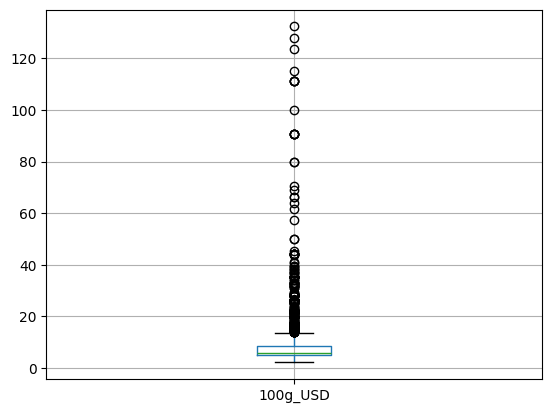

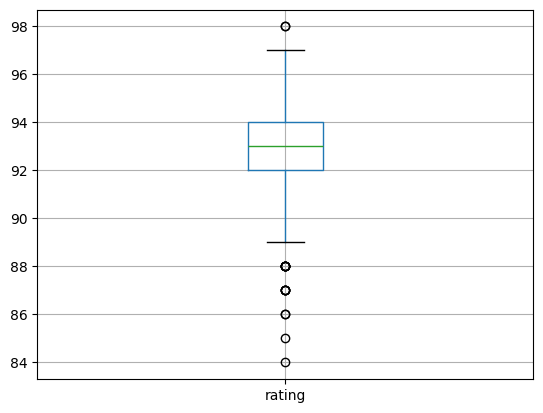

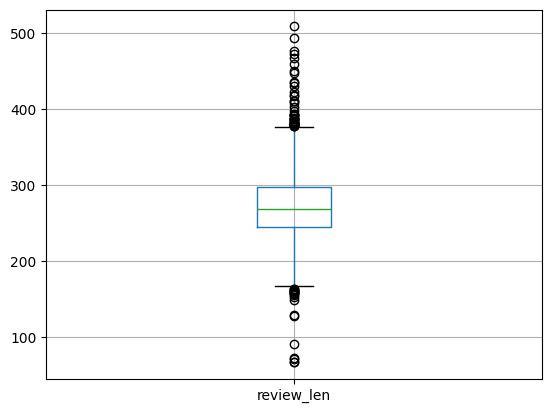

In [28]:
for col in df.select_dtypes(include=['int', 'float']).columns:
    df.boxplot(column=col)
    plt.show()

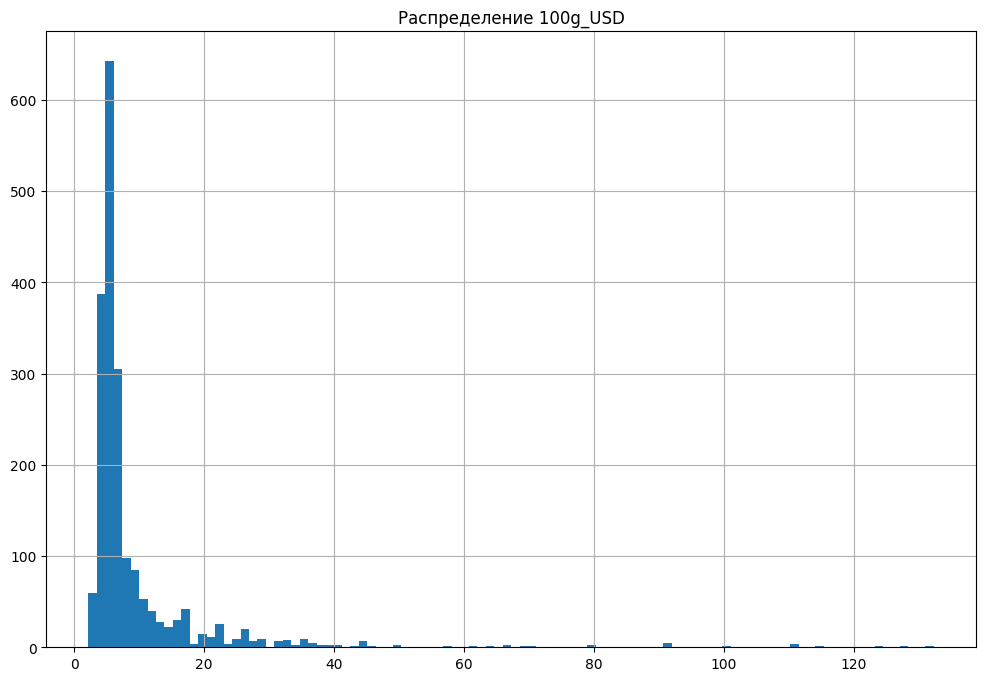

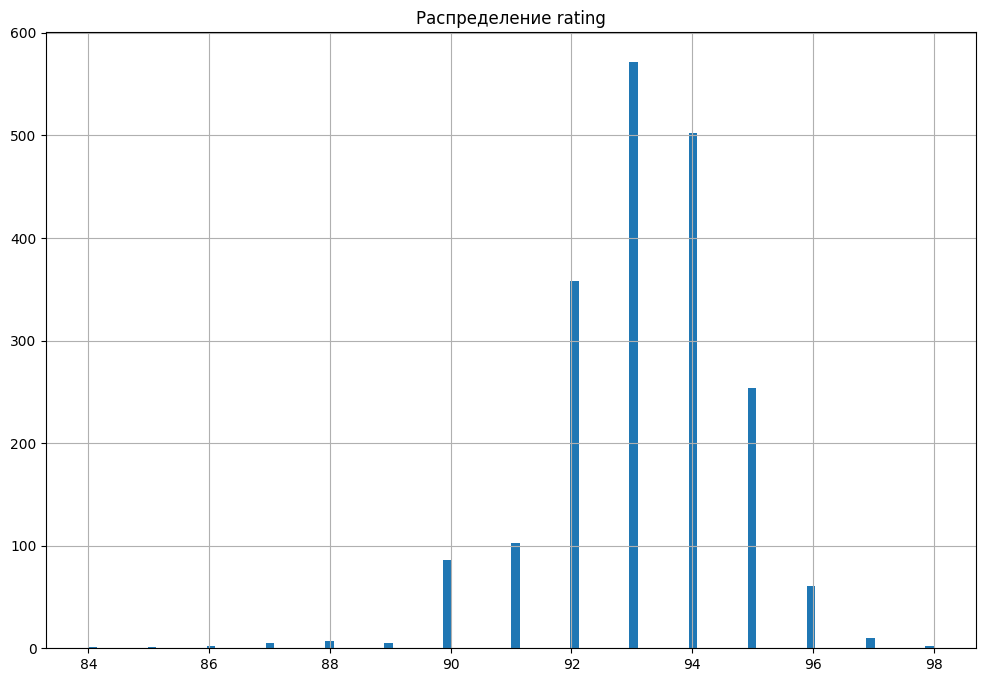

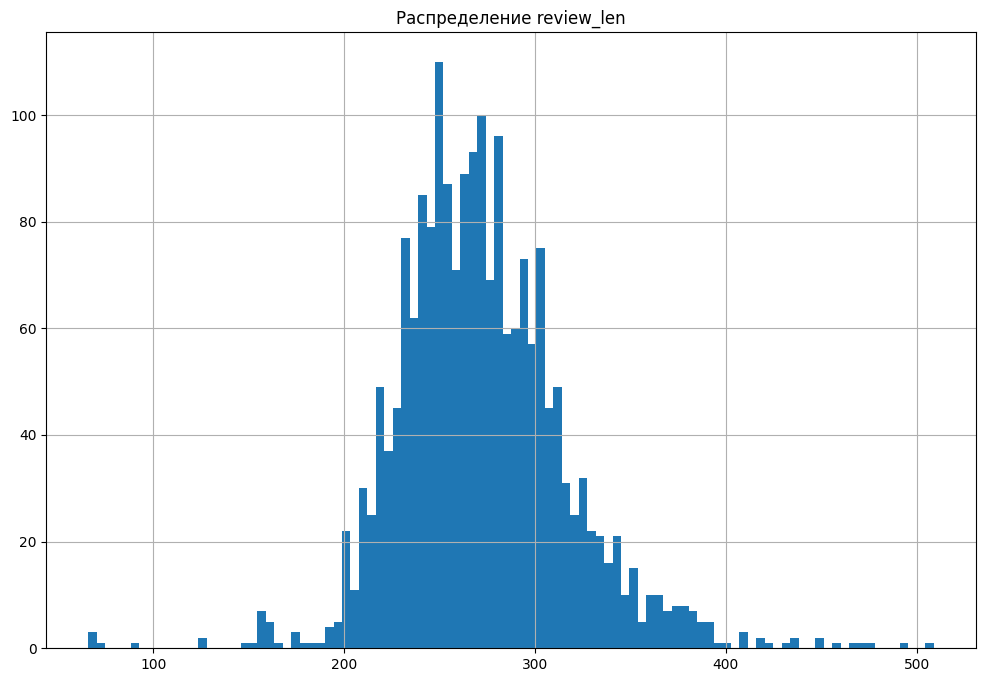

In [29]:
for col in df.select_dtypes(include=['int', 'float']).columns:
    plt.figure(figsize=(12, 8))
    df[col].dropna().hist(bins=100)
    plt.title(f'Распределение {col}')
    plt.show()

In [30]:
cheap = df[df['100g_USD'] <= 10]  # Дешевый кофе
medium = df[(df['100g_USD'] > 10) & (df['100g_USD'] <= 20)]  # Средний
expensive = df[(df['100g_USD'] > 20) & (df['100g_USD'] <= 50)]  # Дорогой
luxury = df[df['100g_USD'] > 50]  # Люкс

print('Распределение по ценовым категориям:')
print(f'Дешевый (<=10$): {len(cheap)/len(df):.1%}')
print(f'Средний (10-20$): {len(medium)/len(df):.1%}')
print(f'Дорогой (20-50$): {len(expensive)/len(df):.1%}')
print(f'Люкс (>50$): {len(luxury)/len(df):.1%}')

Распределение по ценовым категориям:
Дешевый (<=10$): 80.1%
Средний (10-20$): 11.8%
Дорогой (20-50$): 7.0%
Люкс (>50$): 1.2%


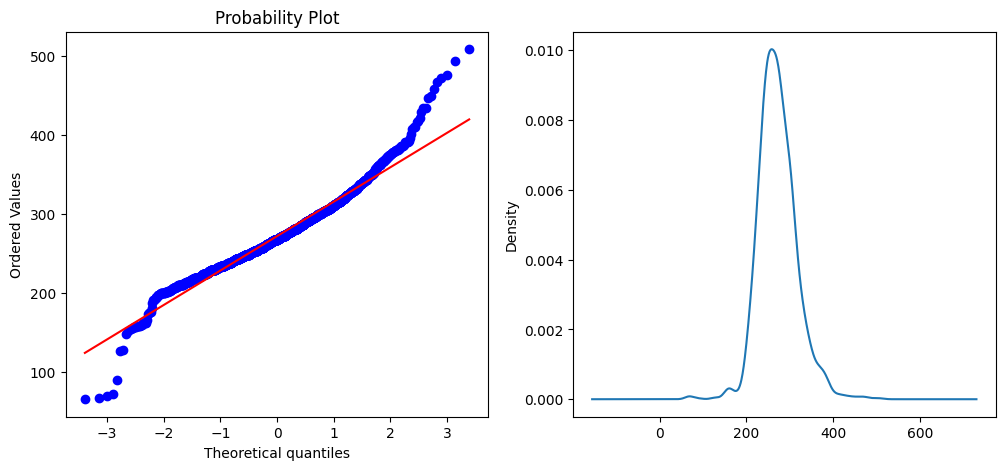

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

stats.probplot(df['review_len'], dist="norm", plot=axes[0])
df['review_len'].plot(kind='kde', ax=axes[1])

plt.show()

**Выводы:**

- `100g_USD` типичное правоскошенное распределение - большинство значений сконцентрировано в диапазоне от 5 до 20$ за 100 грамм кофе,  нулевый значений не осталось после чистки, присутствует очень много выбросов - это классический случай для логарифмирования

- `rating` эта переменная шкальная - большинство кофе получает стабильно высокие оценки - даже дешевый кофе (которого > 80% в выборке) может быть вкусным

- `review_len` - длина отзывов, вероятно, ограничена UX-дизайном платформы - большинство отзывов сконцентрировано около 300 (один пик у KDE - унимодальное распределение). Probplot почти нормальный, но левая часть ниже линии, а правая выше - это говорит о правостороннем распределении

### Задание 13

Проанализируйте распределения категориальных признаков `name`, `roaster`, `roast` и нормализованных признаков стран. Можно ли выделить топ самых часто встречаемых категорий, а редкие объединить в небольшую группу «Прочее»? Если да, предложите для каждого признака границы отсечения частоты, запишите все в виде короткого вывода.

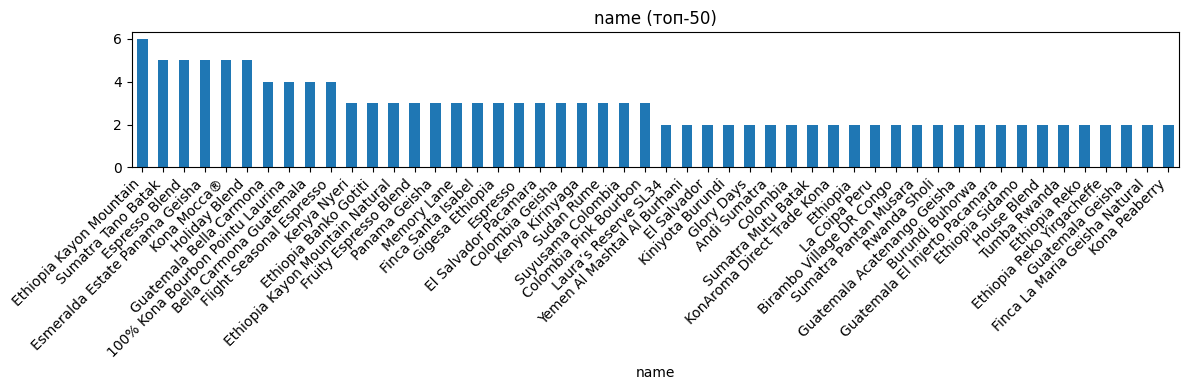

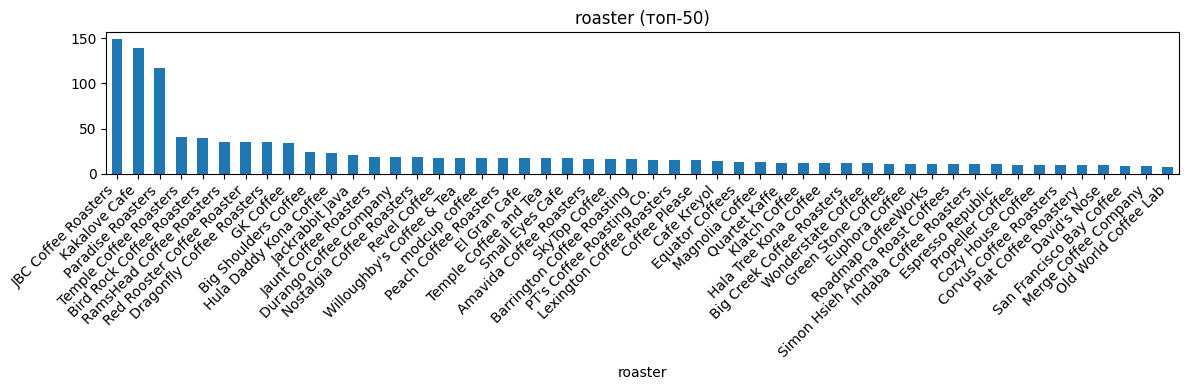

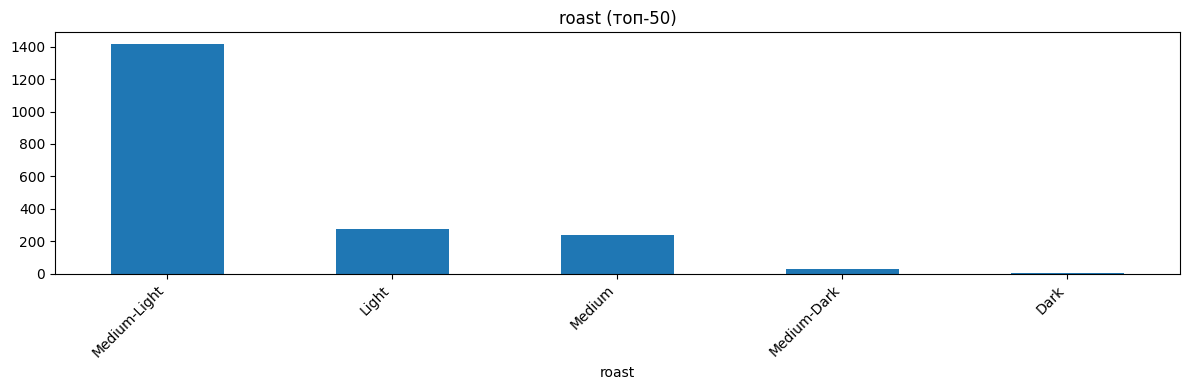

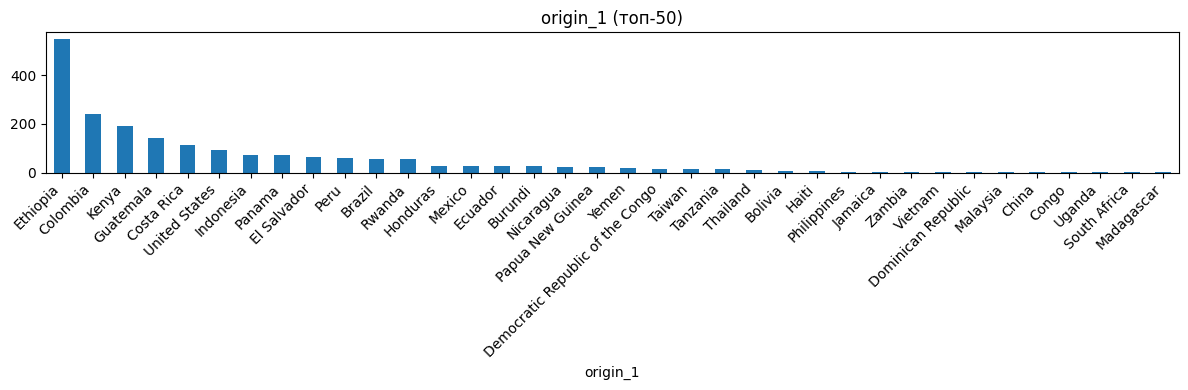

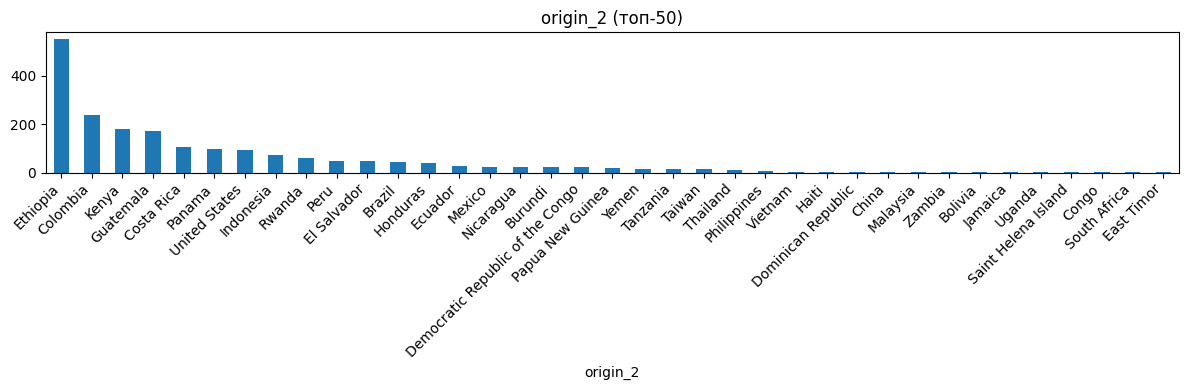

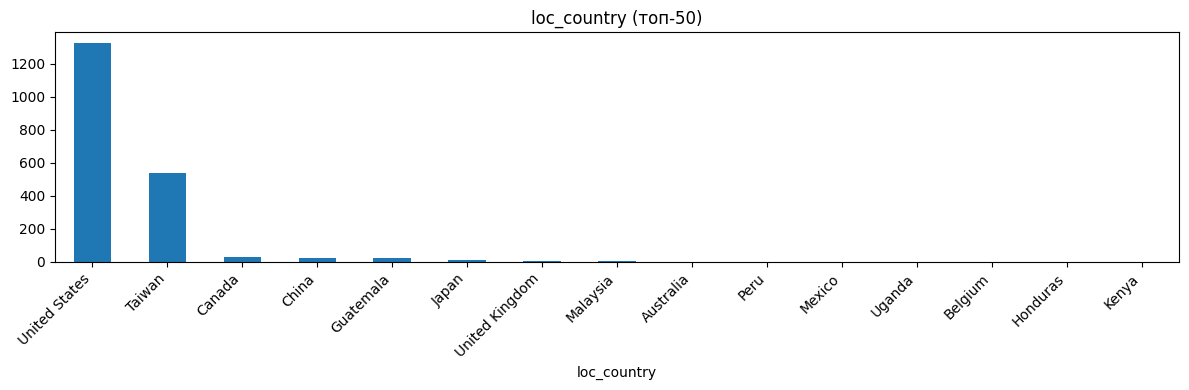

In [32]:
for col in ['name', 'roaster', 'roast', 'origin_1', 'origin_2', 'loc_country']:
    top_n = df[col].value_counts().head(50)
    top_n.plot(kind='bar', figsize=(12, 4))
    plt.title(f'{col} (топ-50)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [33]:
# находим уникальные значения в каждой колонке
origin1_unique = set(df['origin_1'].dropna().unique())
origin2_unique = set(df['origin_2'].dropna().unique())

# значения, которые есть только в origin_2
only_in_origin2 = origin2_unique - origin1_unique

only_in_origin2

{'East Timor', 'Saint Helena Island'}

In [34]:
if only_in_origin2:
    mask = df['origin_2'].isin(only_in_origin2)
    print(f'\nКоличество строк с этими регионами: {mask.sum()}')
    print()
    print('Примеры строк:')
    print(df.loc[mask, ['origin_1', 'origin_2']].head())


Количество строк с этими регионами: 2

Примеры строк:
     origin_1             origin_2
492   Jamaica  Saint Helena Island
1017   Brazil           East Timor


**Выводы:**

- `name` названий кофе очень много, очень ярко выражена мультимодальность этого признака - чаще всего одно и то же название повторяется 6 раз - это происходит потому, что одно и то же кофе оценивали разные люди! Так как у нас стоит задача предсказания цены конкретного кофе (не средняя цена), нам нужно будет "схлопнуть" каждый `name` в одну строку. Большой вопрос в том, как сделать правильно. Вариантов много - либо берем самый длинный отзыв, либо выбираем среднее/медиану для каждого кофе, либо считаем значимым самый последний отзыв по `review_date`. Выбираем последний вариант, так как время отражает инфляцию, а это влияет на цену кофе сильнее всего (экспертная оценка)

- `roaster` названий компаний, занимающихся обжаркой кофе, тоже очень много - при этом выделяются три компании, которые берут на себя треть рынка - тут правильнее всего будет использовать частотное кодирование, чтобы не создавать дисбаланс классов (чтобы не было высокой доли Прочих компаний)

- `roast` степень обжарки кофе эмпирически очень сильный признак - его мы оставим как есть (5 категорий)

- `origin_1` регион произрастания кофе 1 содержит больше информации о кофе - здесь нет экстремального дисбаланса, поэтому можно сначала сгруппировать, а потом применить One-Hot Encoding пеерд подачей в модель

- `origin_2` регион произрастания кофе 2 содержит меньше информации о кофе, его мы удалим - так как всего 2 региона из `origin_2` не присутствуют в `origin_1`, и это всего лишь 2 строки

- `loc_country` тоже категориальный признак - примерно 60% данных это United States, 29% - Taiwan. Остальные - редкие единичные значения. Ситуация аналогична с `roaster` - чтобы не создавать дисбаланс классов, применим частотное кодирование

## Отбор и преобразование признаков

Наконец, приступим к последней части — финальному преобразованию признаков перед моделированием:
* закодируем категориальные;
* удалим оставшиеся лишние признаки;
* масштабируем числовые.


### Задание 14

Выберите подходящий способ кодирования категориальных признаков, не учитывайте редкие категории по выбранным в предыдущем задании порогам. Напишите, почему выбрали такой способ.

In [35]:
# применяем частное кодирование и удаляем исходный признак
df['roaster_freq'] = df['roaster'].map(df['roaster'].value_counts(normalize=True))

df = df.drop('roaster', axis=1)

In [36]:
# применяем частное кодирование и удаляем исходный признак
df['loc_country_freq'] = df['loc_country'].map(df['loc_country'].value_counts(normalize=True))

df = df.drop('loc_country', axis=1)

In [37]:
# сортируем по возрастанию даты
df = df.sort_values('review_date', ascending=True)

# берём последний отзыв для каждого кофе
df = df.drop_duplicates(subset='name', keep='last').copy()

print(f'Было {len(df)} отзывов, осталось {len(df)} уникальных кофе')

# теперь можно удалять этот признак - это просто идентификатор
df = df.drop('name', axis=1)

Было 1799 отзывов, осталось 1799 уникальных кофе


In [38]:
# применяем Original Encoding - чтобы сохранить информацию о порядке в обжарке - от слабой до сильной
roast_mapping = {
    'Light': 0,
    'Medium-Light': 1,
    'Medium': 2,
    'Medium-Dark': 3,
    'Dark': 4
}

df['roast'] = df['roast'].map(roast_mapping)

In [39]:
# группируем и применяем One-Hot Encoding
top_5 = ['Ethiopia', 'Colombia', 'Kenya', 'Guatemala', 'Costa Rica']

df['origin'] = df['origin_1'].where(df['origin_1'].isin(top_5), 'Other')

origin_dummies = pd.get_dummies(df['origin'], prefix='origin', drop_first=True, dtype='int8')

df = pd.concat([df.drop(['origin_1', 'origin'], axis=1), origin_dummies], axis=1)

In [40]:
# просто удаляем
df = df.drop(columns=['origin_2'])

In [41]:
# извлекаем признаки из даты
df['review_year'] = df['review_date'].dt.year
df['review_month'] = df['review_date'].dt.month
df['review_day'] = df['review_date'].dt.day
df['review_quarter'] = df['review_date'].dt.quarter
df['review_dayofweek'] = df['review_date'].dt.dayofweek

coffee_df = df.drop('review_date', axis=1)

In [42]:
# смотрим, что получилось
coffee_df

,roast,100g_USD,rating,review_len,roaster_freq,loc_country_freq,origin_Costa Rica,origin_Ethiopia,origin_Guatemala,origin_Kenya,origin_Other,review_year,review_month,review_day,review_quarter,review_dayofweek
0,1,14.32,95.0,387,0.002539,0.011681,0,0,0,0,1,2017,11,1,4,2
21,1,3.98,93.0,366,0.005079,0.015236,0,0,0,0,1,2017,11,1,4,2
23,1,4.65,94.0,281,0.005079,0.015236,0,0,0,1,0,2017,11,1,4,2
24,0,5.58,93.0,273,0.001524,0.671915,0,0,1,0,0,2017,11,1,4,2
50,1,16.56,95.0,315,0.001016,0.001016,0,0,0,0,1,2017,11,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,1,12.93,94.0,282,0.006602,0.671915,0,0,0,0,1,2022,11,1,4,1
1994,1,4.70,93.0,240,0.008634,0.011681,0,0,1,0,0,2022,11,1,4,1
1958,1,3.82,94.0,236,0.008634,0.011681,0,0,1,0,0,2022,11,1,4,1
1985,1,5.88,91.0,264,0.001016,0.671915,1,0,0,0,0,2022,11,1,4,1


**Выводы:**

Мы провели большую работу - очистили данные от мусора, от ошибок, провели предобработку, исследовали данные, поняли структуру данных и узнали многое о сортах кофе и цен на них.

Мы привели данные к формату, пригодному для машинного обучения.

### Задание 15

Выберите подходящий способ масштабирования числовых признаков и при необходимости таргета. Обоснуйте выбор.

In [43]:
coffee_df.describe()

,roast,100g_USD,rating,review_len,roaster_freq,loc_country_freq,origin_Costa Rica,origin_Ethiopia,origin_Guatemala,origin_Kenya,origin_Other,review_year,review_month,review_day,review_quarter,review_dayofweek
count,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.0,1799.000000,1799.000000
mean,1.013897,9.173802,93.159533,271.226237,0.019126,0.523865,0.058366,0.281267,0.068371,0.100611,0.370762,2020.244580,6.945525,1.0,2.650917,2.934964
std,0.584682,10.902860,1.508451,43.486621,0.026089,0.213740,0.234499,0.449743,0.252452,0.300897,0.483143,1.450017,3.355027,0.0,1.110366,1.967957
min,0.000000,2.200000,84.000000,66.000000,0.000508,0.000508,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.0,1.000000,0.000000
25%,1.000000,4.960000,92.000000,244.000000,0.002031,0.273743,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,4.000000,1.0,2.000000,1.000000
50%,1.000000,5.880000,93.000000,268.000000,0.006602,0.671915,0.000000,0.000000,0.000000,0.000000,0.000000,2021.000000,7.000000,1.0,3.000000,3.000000
75%,1.000000,8.520000,94.000000,296.000000,0.017776,0.671915,0.000000,1.000000,0.000000,0.000000,1.000000,2021.000000,10.000000,1.0,4.000000,5.000000
max,4.000000,132.280000,98.000000,509.000000,0.075673,0.671915,1.000000,1.000000,1.000000,1.000000,1.000000,2022.000000,12.000000,1.0,4.000000,6.000000


**Вывод:**

Мы имеем следующие числовые признаки:

- `roast` $\mu = 1.01, \sigma = 0.58$ - малый разброс в данных, применим только Standart Scalar

- `100g_USD` $\mu = 9.17, \sigma = 10.90$ - ТАРГЕТ, оставляем как есть

- `rating` $\mu = 93.15, \sigma = 1.50$ - малый разброс в данных, почти нормальное распределение, применим только Standart Scalar

- `review_len` $\mu = 271.22, \sigma = 43.48$

Так как многие алгоритмы машинного обучения требуют одинаковые маштабы для разных признаков - чтобы модель не решила, что признак с бОльшим $\sigma$ имеет более важное значение только поэтому.

Дословно - в задачах линейной регрессии при предобработке обычно применяют Standart Scalar, который сначала центрирует данные, переходя из афинного подпространства в линейное, а затем нормирует делением на стандартное отклонение.

$$
x_{\text{scaled}}^{(i)} = \frac{x^{(i)} - \mu}{\sigma}
$$

Но у нас есть выбросы, и мы признали их семантически значимыми.

Так как Standart Scalar - самый каноничный метод при маштабировании признаков в задаче регресии, мы будем логарифмировать переменную `review_len` - эксцесс и асимметричность приблизятся к нулю, и мы сможем приблизить их распределение к нормальному.

Далее применим Standart Scalar уже к логарифмированному признаку, а исходные - удалим.

Для `roast`, `rating` сразу используем Standart Scalar.

In [44]:
# перед маштабированием признаков разделим выборку на train и test
X = coffee_df.drop('100g_USD', axis=1)
y = coffee_df['100g_USD']

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, # матрица признаков
    y, # вектор ответов
    test_size=0.2, # размер тестовой выборки
    random_state=42 # зерно случайности - для воспроизводимости результатов, я прочитал об этом - почему 42 ;) Интересно!
)

In [45]:
# здесь мы создаем конвейер преобразований, который будет по-разному обрабатывать разные признаки
# одинаково на train и test

# определяем все столбцы
all_columns = X_train_raw.columns.tolist()
numeric_features = ['roast', 'rating', 'review_len']  # только те, что масштабируем

log_transformer = FunctionTransformer(
    np.log1p,
    feature_names_out='one-to-one'  # ← ДОБАВЬТЕ ЭТУ СТРОЧКУ!
)

preprocessor = ColumnTransformer([
    # Шаг 1: review_len - логарифм + стандартизация
    ('step1: review_len', Pipeline([
        ('log1p', log_transformer),
        ('scaler', StandardScaler())
    ]), ['review_len']),

    # Шаг 2: roast, rating - только стандартизация
    ('step2: roast, rating', StandardScaler(), ['roast', 'rating']),

    # Шаг 3: остальные признаки (уже закодированные) пропускаем
    ('step3: other', 'passthrough',
     [col for col in all_columns if col not in numeric_features])
])

### Задание 16

Объедините все преобразованные признаки в единый датафрейм, удалите лишние и разделите датасет на тренировочную и тестовую выборки. Соотношение train/test можно взять 80/20.

In [46]:
print('Сделано в шаге выше - чтобы обучить модель на трейне и оценить на тесте, КОРРЕКТНО будет применить маштабирование уже после разделения на train и test')

Сделано в шаге выше - чтобы обучить модель на трейне и оценить на тесте, КОРРЕКТНО будет применить маштабирование уже после разделения на train и test


In [47]:
X_train_raw

,roast,rating,review_len,roaster_freq,loc_country_freq,origin_Costa Rica,origin_Ethiopia,origin_Guatemala,origin_Kenya,origin_Other,review_year,review_month,review_day,review_quarter,review_dayofweek
1965,0,93.0,249,0.008634,0.671915,0,0,0,0,0,2022,10,1,4,5
1924,1,93.0,244,0.070594,0.273743,0,0,0,0,1,2022,10,1,4,5
1817,1,92.0,244,0.001016,0.273743,1,0,0,0,0,2022,7,1,3,4
212,1,90.0,268,0.005587,0.671915,0,0,0,0,1,2018,8,1,3,2
1045,1,94.0,206,0.000508,0.273743,0,1,0,0,0,2021,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,1,94.0,286,0.002031,0.671915,0,0,0,0,1,2021,6,1,2,1
1508,1,96.0,313,0.011681,0.671915,0,0,0,0,1,2021,11,1,4,0
961,1,94.0,229,0.017776,0.671915,0,1,0,0,0,2020,11,1,4,6
1665,1,93.0,242,0.004063,0.671915,0,0,0,0,1,2022,3,1,1,1


In [48]:
X_test_raw

,roast,rating,review_len,roaster_freq,loc_country_freq,origin_Costa Rica,origin_Ethiopia,origin_Guatemala,origin_Kenya,origin_Other,review_year,review_month,review_day,review_quarter,review_dayofweek
1206,0,92.0,224,0.000508,0.273743,0,1,0,0,0,2021,4,1,2,3
295,1,92.0,255,0.008634,0.671915,0,0,1,0,0,2018,10,1,4,0
1792,1,92.0,211,0.001016,0.671915,1,0,0,0,0,2022,6,1,2,2
502,2,95.0,236,0.070594,0.273743,0,0,0,1,0,2019,8,1,3,3
941,1,90.0,214,0.002539,0.011681,0,0,1,0,0,2020,10,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,1,95.0,259,0.008634,0.671915,0,0,0,0,0,2022,10,1,4,5
1020,1,93.0,251,0.004571,0.671915,0,0,0,0,1,2020,12,1,4,1
1802,1,93.0,188,0.002539,0.671915,0,0,0,0,0,2022,7,1,3,4
993,1,93.0,236,0.020315,0.671915,0,1,0,0,0,2020,11,1,4,6


In [49]:
y_train

,100g_USD
1965,11.02
1924,2.83
1817,10.08
212,4.10
1045,4.25
...,...
1269,5.88
1508,22.02
961,5.58
1665,5.88


In [50]:
y_test

,100g_USD
1206,6.34
295,5.14
1792,4.11
502,4.96
941,4.85
...,...
1962,11.02
1020,5.29
1802,5.86
993,5.88


**Вывод:**

Мы разделили датасет на тренировочную и тестовую выборки, затем определили логику маштабирования числовых признаков.

Итог - пайплайн обучения, который записан в переменную preprocessor - он сделает корректное маштабирование признаков - в соответствии с выбранным нами пайплайном.

In [51]:
preprocessor.fit(X_train_raw)  # сработает, так как у нас есть 'step3: other', 'passthrough'

ColumnTransformer(transformers=[('step1: review_len',
                                 Pipeline(steps=[('log1p',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log1p'>)),
                                                 ('scaler', StandardScaler())]),
                                 ['review_len']),
                                ('step2: roast, rating', StandardScaler(),
                                 ['roast', 'rating']),
                                ('step3: other', 'passthrough',
                                 ['roaster_freq', 'loc_country_freq',
                                  'origin_Costa Rica', 'origin_Ethiopia',
                                  'origin_Guatemala', 'origin_Kenya',
                                  'origin_Other', 'review_year', 'review_month',
                                  'review_day', 'review_quarter',
                                  'review_dayofweek'])])

In [52]:
X_train_scaled = preprocessor.transform(X_train_raw)  # масштабируем трейн
X_test_scaled = preprocessor.transform(X_test_raw)    # масштабируем тест

print(f'Размерность после препроцессинга: {X_train_scaled.shape}')

Размерность после препроцессинга: (1439, 15)


### Задание 17

Отберите 30 лучших признаков для предсказания целевой переменной при помощи `SelectKBest`. Выведите на экран  названия отобранных признаков.

In [53]:
selector = SelectKBest(f_regression, k=min(30, X_train_scaled.shape[1]))
selector.fit(X_train_scaled, y_train)

print(f'Отобрано признаков: {selector.get_support().sum()}/{X_train_scaled.shape[1]}')

# просто по индексам пока что
for i, idx in enumerate(np.where(selector.get_support())[0], 1):
    print(f'{i:2d}. Признак {idx:2d} F={selector.scores_[idx]:6.1f}')

Отобрано признаков: 15/15
 1. Признак  0 F=   4.5
 2. Признак  1 F=   9.8
 3. Признак  2 F= 108.9
 4. Признак  3 F=   0.9
 5. Признак  4 F=   0.4
 6. Признак  5 F=   0.2
 7. Признак  6 F=  13.2
 8. Признак  7 F=   5.8
 9. Признак  8 F=   8.4
10. Признак  9 F=  32.9
11. Признак 10 F=   1.2
12. Признак 11 F=   2.4
13. Признак 12 F=   0.0
14. Признак 13 F=   3.5
15. Признак 14 F=   2.2


In [54]:
# получим имена признаков
feature_names = preprocessor.get_feature_names_out()

print('СОПОСТАВЛЕНИЕ ИНДЕКСОВ И ПРИЗНАКОВ:')
print('='*60)

for i, idx in enumerate(np.where(selector.get_support())[0], 1):
    f_score = selector.scores_[idx]
    p_value = selector.pvalues_[idx]

    # красивое имя (убираем stepX: prefix)
    if '__' in feature_names[idx]:
        short_name = feature_names[idx].split('__')[1]
    else:
        short_name = feature_names[idx]

    # значимость
    sig = '***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else ''

    print(f'{i:2d}. idx={idx:2d} {short_name:25} F={f_score:6.1f} p={p_value:.4f} {sig}')

print('='*60)

СОПОСТАВЛЕНИЕ ИНДЕКСОВ И ПРИЗНАКОВ:
 1. idx= 0 review_len                F=   4.5 p=0.0338 *
 2. idx= 1 roast                     F=   9.8 p=0.0018 **
 3. idx= 2 rating                    F= 108.9 p=0.0000 ***
 4. idx= 3 roaster_freq              F=   0.9 p=0.3331 
 5. idx= 4 loc_country_freq          F=   0.4 p=0.5395 
 6. idx= 5 origin_Costa Rica         F=   0.2 p=0.6956 
 7. idx= 6 origin_Ethiopia           F=  13.2 p=0.0003 ***
 8. idx= 7 origin_Guatemala          F=   5.8 p=0.0162 *
 9. idx= 8 origin_Kenya              F=   8.4 p=0.0038 **
10. idx= 9 origin_Other              F=  32.9 p=0.0000 ***
11. idx=10 review_year               F=   1.2 p=0.2788 
12. idx=11 review_month              F=   2.4 p=0.1230 
13. idx=12 review_day                F=   0.0 p=1.0000 
14. idx=13 review_quarter            F=   3.5 p=0.0605 
15. idx=14 review_dayofweek          F=   2.2 p=0.1390 


**Вывод:**

После корректного масштабирования числовых признаков (log1p + StandardScaler для `review_len`, StandardScaler для `roast` и `rating`) и применения SelectKBest с F-регрессией были отобраны 7 статистически значимых признаков (p < 0.05) из 15 исходных.

Наиболее важными для предсказания цены кофе оказались: рейтинг (`rating`), происхождение из Эфиопии, Кении, Гватемалы и 'других' стран, степень обжарки (`roast`) и длина отзыва (`review_len`).

Остальные 8 признаков, включая частотные кодировки и временные метки, статистически незначимы и могут быть исключены из финальной модели для улучшения её интерпретируемости и уменьшения риска переобучения.

In [55]:
# автоматический отбор по p-value < 0.05
significant_mask = selector.pvalues_ < 0.05
X_train_final = X_train_scaled[:, significant_mask]
X_test_final = X_test_scaled[:, significant_mask]

print(f'Автоматически отобрано {significant_mask.sum()} признаков')
print(f'Train shape: {X_train_final.shape}')

Автоматически отобрано 7 признаков
Train shape: (1439, 7)


Позравляем! Вы подготовили все к последнему этапу — машинному обучению. Ниже код константного алгоритма с семинара, можете запустить его и проверить качество базовой модели:)

In [56]:
# Константное предсказание — среднее по train
y_pred = np.full_like(y_test, fill_value=y_train.mean(), dtype=float)

# Метрики
mse = metrics.mean_squared_error(y_test, y_pred)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"MAPE: {mape:.4f}")

MSE: 109.1670
MAPE: 0.6688


**Вывод:**

У нас есть baseline модель со следующими метриками:

- MSE = 109.16 - в среднем модель ошибается на $\sqrt{109.16} \approx 10$ долларов при предсказании цены

- MAPE = 0.66 - у нас огромной разброс цен при предсказании

Наша модель должна быть лучше!

### Задание 18*
Проведите анализ временного ряда средней цены кофе.

1. Убедитесь, что признак `review_date` приведен в формат `datetime`.
2. Агрегируйте данные по месяцам, вычислив среднюю цену `100g_USD`.
3. Постройте временной ряд средней цены кофе.
4. Выполните аддитивную декомпозицию временного ряда на тренд, сезонность и шум.
5. Проанализируйте полученные компоненты и сделайте вывод:
   - присутствует ли тренд;
   - наблюдается ли сезонность;
   - насколько велика шумовая компонента.

Напишите код и краткий вывод (3–5 предложений).


In [57]:
df['review_date'].dtype

dtype('<M8[ns]')

In [58]:
df_analysis = df[['review_month', 'review_year', '100g_USD']]
df_analysis

,review_month,review_year,100g_USD
0,11,2017,14.32
21,11,2017,3.98
23,11,2017,4.65
24,11,2017,5.58
50,11,2017,16.56
...,...,...,...
1978,11,2022,12.93
1994,11,2022,4.70
1958,11,2022,3.82
1985,11,2022,5.88


In [59]:
df_avg_price = (
    df_analysis.groupby(['review_year', 'review_month'], as_index=False)['100g_USD']
    .mean()
    .assign(date=lambda x: pd.to_datetime(x['review_year'].astype(str) + '-' + x['review_month'].astype(str) + '-01'))
    .sort_values('date')
    .rename(columns={'100g_USD': 'avg_price_per_100g_USD'})
)
df_avg_price

,review_year,review_month,avg_price_per_100g_USD,date
0,2017,11,7.037419,2017-11-01
1,2017,12,9.699130,2017-12-01
2,2018,1,24.050833,2018-01-01
3,2018,2,5.450000,2018-02-01
4,2018,3,6.497143,2018-03-01
...,...,...,...,...
56,2022,7,11.775116,2022-07-01
57,2022,8,6.657692,2022-08-01
58,2022,9,9.098182,2022-09-01
59,2022,10,8.040339,2022-10-01


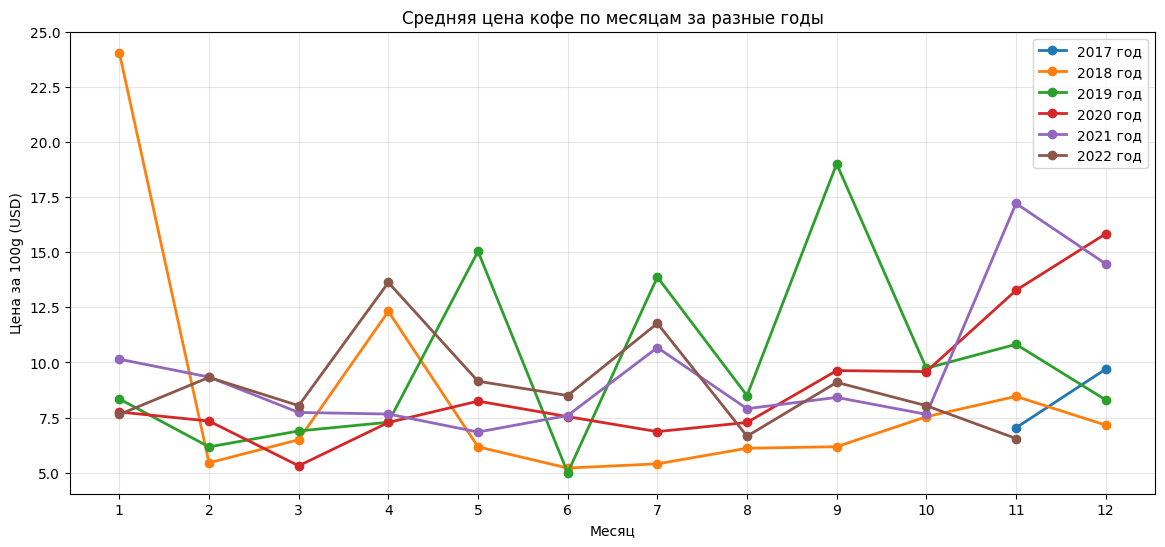

In [60]:
plt.figure(figsize=(14, 6))

# для каждого года своя линия
years = df_avg_price['review_year'].unique()
for year in sorted(years):
    year_data = df_avg_price[df_avg_price['review_year'] == year]
    plt.plot(year_data['review_month'], year_data['avg_price_per_100g_USD'],
             marker='o', linewidth=2, label=f'{year} год')

plt.title('Средняя цена кофе по месяцам за разные годы')
plt.xlabel('Месяц')
plt.ylabel('Цена за 100g (USD)')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13))
plt.legend()
plt.show()

Количество наблюдений: 61
Период с 2017-11-01 00:00:00 по 2022-11-01 00:00:00


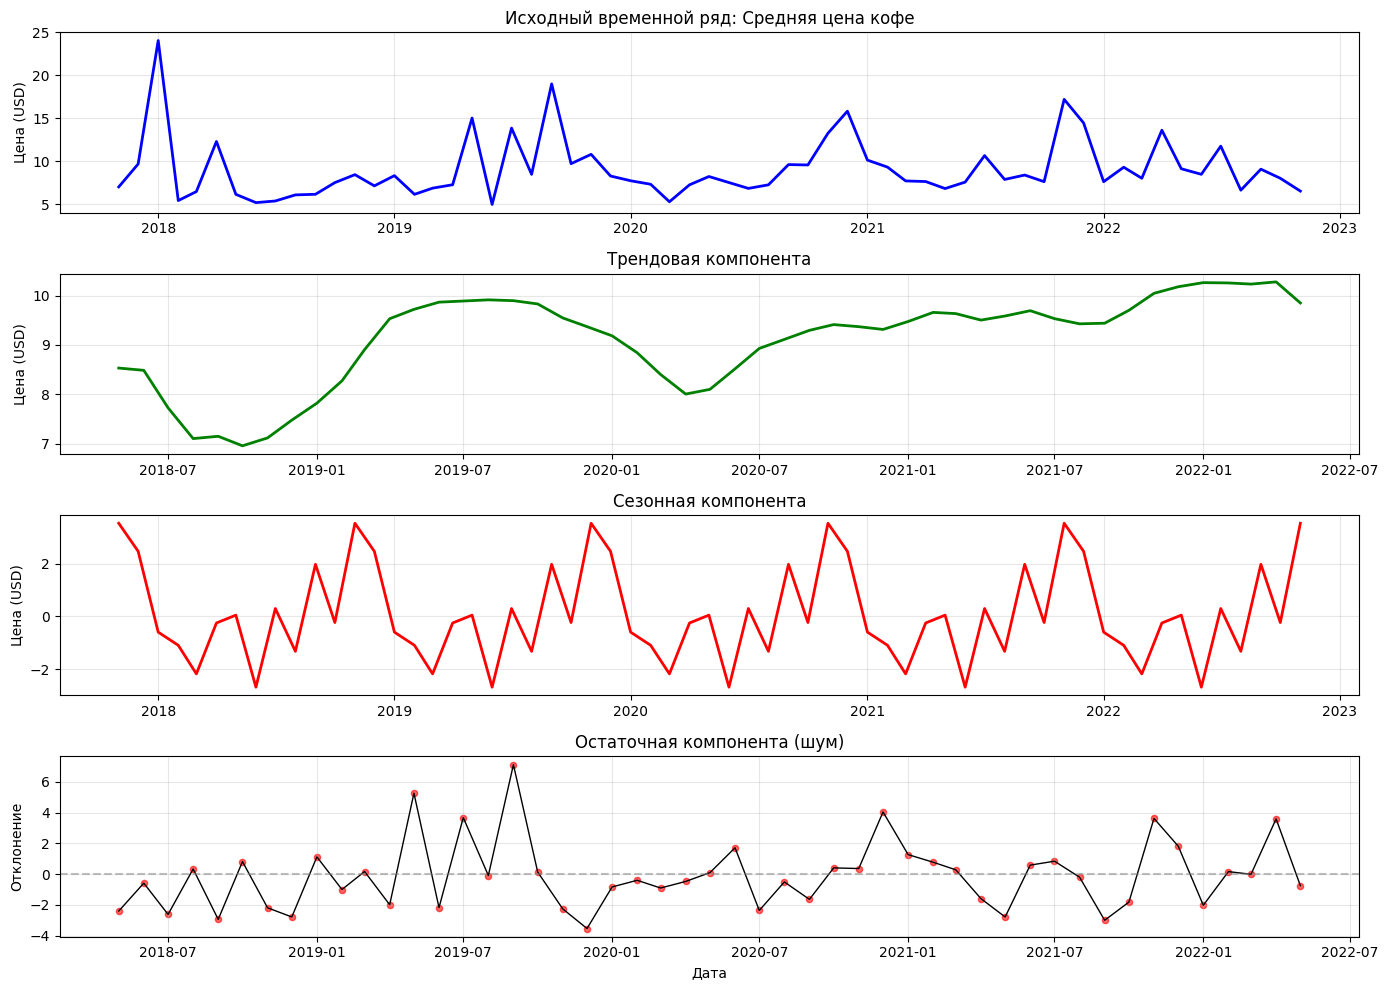

In [61]:
# создаем временной ряд с датами
df_avg_price['date'] = pd.to_datetime(
    df_avg_price['review_year'].astype(str) + '-' +
    df_avg_price['review_month'].astype(str) + '-01'
)

# устанавливаем дату как индекс
df_ts = df_avg_price.set_index('date')['avg_price_per_100g_USD']

# проверяем, достаточно ли данных для декомпозиции
print(f'Количество наблюдений: {len(df_ts)}')
print(f'Период с {df_ts.index.min()} по {df_ts.index.max()}')

# выполняем аддитивную декомпозицию (период = 12 месяцев для годовой сезонности)
result = seasonal_decompose(df_ts, model='additive', period=12)

# визуализация результатов
fig, axes = plt.subplots(4, 1, figsize=(14, 10))

# 1. исходный ряд
axes[0].plot(result.observed, 'b-', linewidth=2)
axes[0].set_title('Исходный временной ряд: Средняя цена кофе')
axes[0].set_ylabel('Цена (USD)')
axes[0].grid(True, alpha=0.3)

# 2. тренд
axes[1].plot(result.trend, 'g-', linewidth=2)
axes[1].set_title('Трендовая компонента')
axes[1].set_ylabel('Цена (USD)')
axes[1].grid(True, alpha=0.3)

# 3. сезонность
axes[2].plot(result.seasonal, 'r-', linewidth=2)
axes[2].set_title('Сезонная компонента')
axes[2].set_ylabel('Цена (USD)')
axes[2].grid(True, alpha=0.3)

# 4. остатки (шум)
axes[3].plot(result.resid, 'k-', linewidth=1)
axes[3].scatter(result.resid.index, result.resid.values, s=20, c='red', alpha=0.6)
axes[3].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[3].set_title('Остаточная компонента (шум)')
axes[3].set_ylabel('Отклонение')
axes[3].set_xlabel('Дата')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Выводы:**

Исходный ряд = Средняя цена кофе по месяцам
Аддитивная модель = Тренд + Сезонность + Шум

Анализ каждой компоненты аддитивной модели:

1. ТРЕНД (Долгосрочная тенденция)

Направление: Общий рост цен на кофе с течением времени

Ключевое событие: Резкое падение в феврале-марте 2020 года

Гипотеза: Падение может быть связано с пандемией COVID-19, которая:

- Начала серьезно влиять на мировую экономику в марте 2020

- Вызвала сбои в цепочках поставок

Привела к снижению спроса в сегменте HoReCa (отели, рестораны, кафе)

2. СЕЗОННОСТЬ (Повторяющиеся годовые паттерны)

Пиковые периоды: Конец года (октябрь-декабрь)

Объяснение: Повышение спроса в преддверии зимних праздников

Увеличение потребления горячих напитков в холодный период

Самые низкие цены: Летние месяцы (июнь-август)

Объяснение: Снижение потребления горячих напитков

Сезон отпусков, уменьшение деловой активности

3. ШУМ (Случайные колебания)

Общая характеристика: Колебания в основном близки к нулю

Аномальные всплески:

- Середина 2019 года: Первые сообщения о COVID-19 в Китае (декабрь 2019)

- 2020 год: Нестабильность, связанная с пандемией

Качество модели: Высокое (маленькие остатки)